In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# Capas que se emplean para una red neuronal convolucional
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
# Convierte un vector de clases (valores enteros) a una matriz de valores binarios
from tensorflow.keras.utils import to_categorical

<FONT COLOR="red"> <B>SUGERENCIA:</B> Realizar pruebas con cada uno de los datasets </FONT>


In [ ]:
# Importar el dataset de entrenamiento
# Imágenes de ropa
from tensorflow.keras.datasets import fashion_mnist
# Se carga el dataset
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Imágenes de digitos escritos a mano
# from tensorflow.keras.datasets import mnist
# Se carga el dataset
# (train_X,train_Y), (test_X,test_Y) = mnist.load_data()

<FONT COLOR="blue"> <B>NOTA:</B> Los datasets empleados en esta práctica sólo tienen un canal, ya que son imágenes en escala de grises</FONT>

In [ ]:
# El dataset se debe reajustar a (número_imágenes, width_img, height_img, canales)
train_X = np.array(train_X).reshape(train_X.shape[0],28,28,1)
test_X = np.array(test_X).reshape(test_X.shape[0],28,28,1)

In [ ]:
train_X.shape

(60000, 28, 28, 1)

In [ ]:
# Normalización de los datos
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.0
test_X = test_X / 255.0

<FONT COLOR="red"> <B>NOTA:</B> </br></FONT>
Una red convolucional no trabaja con datos categoricos de manera directa, por lo tanto se deben transformar

In [ ]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

NameError: name 'to_categorical' is not defined

In [ ]:
# Definir la estructura del modelo
model = Sequential()
# Sólo en la primera capa se indica la dimensión de las imágenes de entrada
# Para nuestros datasets, el tamaño de las imágenes es 28x28 y el número de canales es uno
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compilar modelo
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
# Impresión de la arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [ ]:
epochs = 5
batch_size= 256

history = model.fit(train_X, train_Y_one_hot,
         epochs=epochs,
         batch_size=batch_size,
         validation_data=(test_X,test_Y_one_hot))

Epoch 1/5
235/235 [==============================] - 7s 7ms/step - loss: 0.7336 - accuracy: 0.7366 - val_loss: 0.5413 - val_accuracy: 0.8029
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.4403 - accuracy: 0.8417 - val_loss: 0.4173 - val_accuracy: 0.8493
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3818 - accuracy: 0.8650 - val_loss: 0.4088 - val_accuracy: 0.8474
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3542 - accuracy: 0.8735 - val_loss: 0.4187 - val_accuracy: 0.8429
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3300 - accuracy: 0.8821 - val_loss: 0.3510 - val_accuracy: 0.8733


<FONT COLOR="red"> <B>Accuracy: 88%</B>

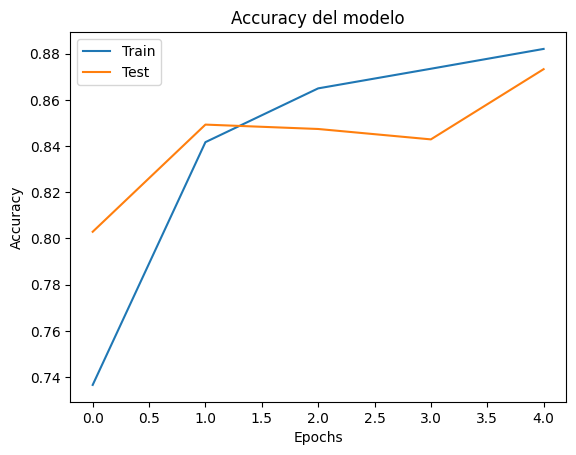

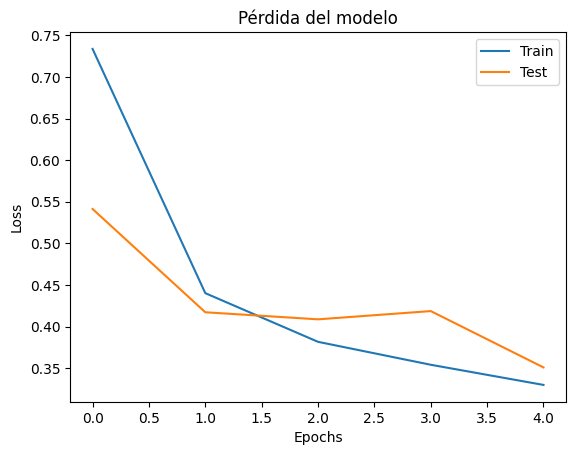

In [ ]:
import matplotlib.pyplot as plt

# Grafica accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Grafica pérdida (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


1/1 [==============================] - 0s 17ms/step
2		

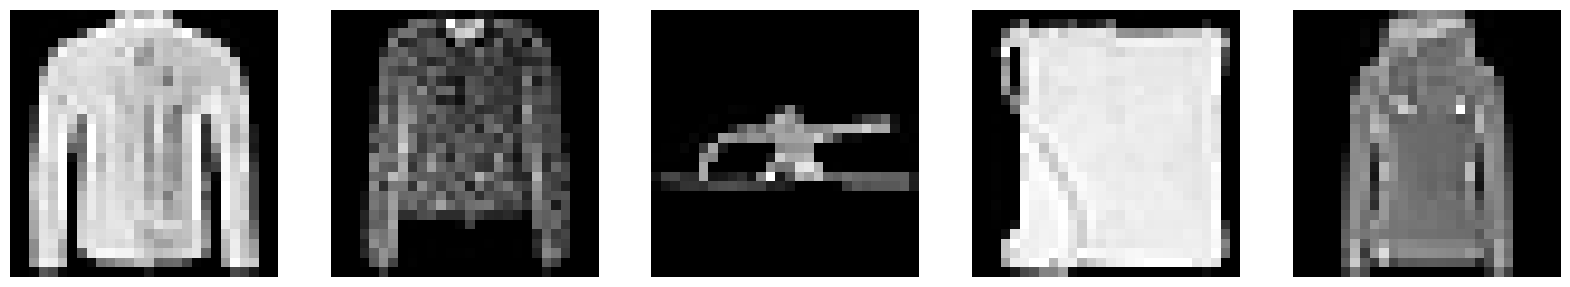

In [ ]:
figure = plt.figure(figsize=(20,20))
for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(test_X[i+50,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(test_X[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t\t")

<h1> Visualización de activaciones intermedias </h1>

Selección de las capas que se van a visualizar y se genera el modelo de activación

In [ ]:
layer_outputs = [layer.output for layer in model.layers[0:4]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

Selección de una imagen aleatoria, la cual se usará en el modelo de activación

(-0.5, 27.5, 27.5, -0.5)

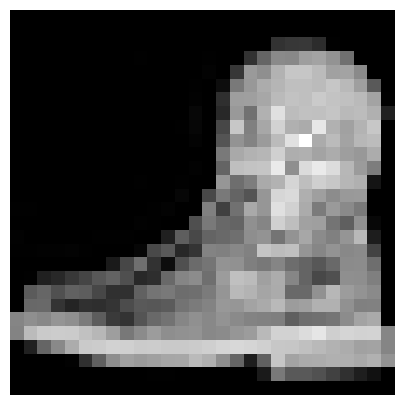

In [ ]:
img = test_X[108].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

Generación de las salidas de activación a partir de las capas seleccionadas

In [ ]:
activations = activation_model.predict(img)

1/1 [==============================] - 0s 109ms/step


Visualización de las imágenes

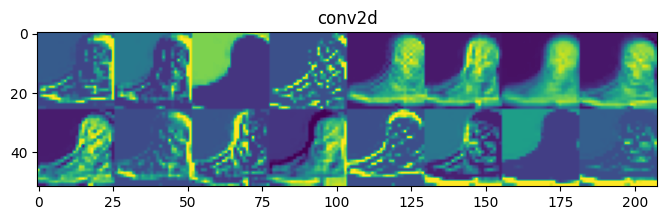

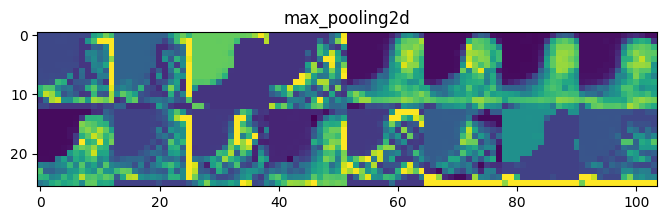

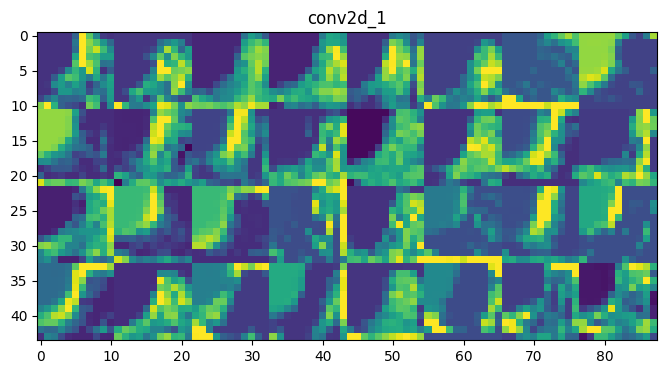

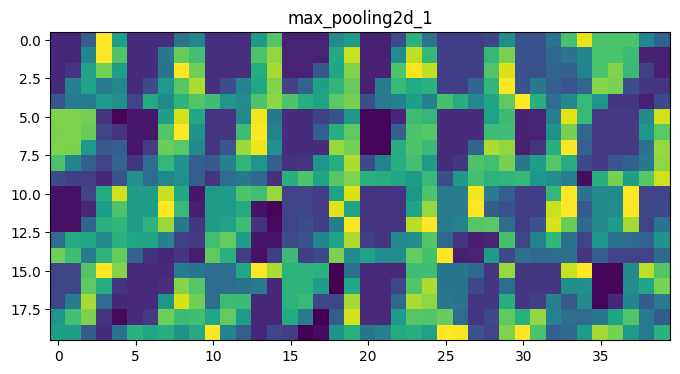

In [ ]:
layer_names = []
for layer in model.layers[0:4]:
    layer_names.append(layer.name) # Número de capas

images_row = 8
# Se muestran los mapas de características
for layer_name, layer_activation in zip(layer_names, activations):
    # Número de características en el mapa de características
    n_features = layer_activation.shape[-1]
    #The feature map has shape (1, size, size, n_features).
    size = layer_activation.shape[1]
    n_cols = n_features // images_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')